# <font color=dodgerblue> Visual check of individual runs according to session name
***
### To visually check all the position data classified as an individual run.
### It will be necessary to determine which runs are "real" and with are not and, secondly, it will allow the building of a run specs file per session, containing run-relevant information such as stim condition, outcome etc.
### The raw timestamped position dataframe (no run specifications) will be saved into the files_path
***

## <font color=firebrick>Imports
***

In [1]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

from collect_and_organize_position_data_optogenetics import collect_and_organize_position_data

## <font color=firebrick> Inputs
***

In [24]:
files_path = "E:\POSITION DATA\PANTUFA_CTRL7"
session ="2021-03-12T13_33_29"

## <font color=mediumseagreen> Collect data and save into a .csv file
***
    
#### Collection of a dataframe with the timestamped position data from all sessions.
#### Interpolates NaN values and zeros in the data and checks for length discrepancies for same session position and timestamp data
#### Subdivides the position data into runs, labelling them with a run number and the corresponding session

In [3]:
# Collect a dataframe with position data from all sessions.
data = collect_and_organize_position_data(files_path)


 Opening timestamps:PANTUFA_DNMP16_PRESTIM1_XY_TIMESTAMPS_2021-03-02T10_58_27.csv. Length:93530

 Opening position:PANTUFA_DNMP16_PRESTIM1_CENTROID_POSITION2021-03-02T10_58_27.csv. Length:93530
2021-03-02T10_58_27
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP17_PRESTIM2_XY_TIMESTAMPS_2021-03-03T09_45_46.csv. Length:92215

 Opening position:PANTUFA_DNMP17_PRESTIM2_CENTROID_POSITION2021-03-03T09_45_46.csv. Length:92157

 N points in session 2021-03-03T09_45_46 is different!

2021-03-03T09_45_46
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP18_PRESTIM3_XY_TIMESTAMPS_2021-03-04T11_10_14.csv. Length:99154

 Opening position:PANTUFA_DNMP18_PRESTIM3_CENTROID_POSITION2021-03-04T11_10_14.csv. Length:99154
2021-03-04T11_10_14
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP19_STIM1_XY_TIMESTAMPS_2021-03-05T12_36_55.csv. Length:92234

 Opening position:PANTUFA_DNMP19_STIM1_CENTROID_POSITION2021-03-05T12_36_55.csv. Length:92234
2021-03-05T12_36_55
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP20_STIM2_XY_TIMESTAMPS_2021-03-08T11_10_42.csv. Length:91040

 Opening position:PANTUFA_DNMP20_STIM2_CENTROID_POSITION2021-03-08T11_10_42.csv. Length:91040


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 

2021-03-08T11_10_42
Series([], Name: diff, dtype: int64)
-100

 Opening timestamps:PANTUFA_DNMP21_STIM3_XY_TIMESTAMPS_2021-03-09T11_05_35.csv. Length:99339

 Opening position:PANTUFA_DNMP21_STIM3_CENTROID_POSITION2021-03-09T11_05_35.csv. Length:99339
2021-03-09T11_05_35
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP22_STIM4_XY_TIMESTAMPS_2021-03-10T13_45_12.csv. Length:85910

 Opening position:PANTUFA_DNMP22_STIM4_CENTROID_POSITION2021-03-10T13_45_12.csv. Length:85910
2021-03-10T13_45_12
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP23_STIM5_XY_TIMESTAMPS_2021-03-11T11_35_40.csv. Length:92356

 Opening position:PANTUFA_DNMP23_STIM5_CENTROID_POSITION2021-03-11T11_35_40.csv. Length:92356


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 

2021-03-11T11_35_40
Series([], Name: diff, dtype: int64)
-100

 Opening timestamps:PANTUFA_DNMP23_STIM6_XY_TIMESTAMPS_2021-03-12T13_33_29.csv. Length:89338

 Opening position:PANTUFA_DNMP23_STIM6_CENTROID_POSITION2021-03-12T13_33_29.csv. Length:89338
2021-03-12T13_33_29
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP25_STIM7_XY_TIMESTAMPS_2021-03-15T11_18_36.csv. Length:84425

 Opening position:PANTUFA_DNMP25_STIM7_CENTROID_POSITION2021-03-15T11_18_36.csv. Length:84425
2021-03-15T11_18_36
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP26_STIM8_XY_TIMESTAMPS_2021-03-16T11_21_47.csv. Length:84299

 Opening position:PANTUFA_DNMP26_STIM8_CENTROID_POSITION2021-03-16T11_21_47.csv. Length:84299
2021-03-16T11_21_47
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP27_STIM10_XY_TIMESTAMPS_2021-03-18T11_37_22.csv. Length:74625

 Opening position:PANTUFA_DNMP27_STIM10_CENTROID_POSITION2021-03-18T11_37_22.csv. Length:74625
2021-03-18T11_37_22
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP27_STIM9_XY_TIMESTAMPS_2021-03-17T11_28_10.csv. Length:82863

 Opening position:PANTUFA_DNMP27_STIM9_CENTROID_POSITION2021-03-17T11_28_10.csv. Length:82863
2021-03-17T11_28_10
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP28_STIM11_XY_TIMESTAMPS_2021-03-19T11_12_32.csv. Length:84907

 Opening position:PANTUFA_DNMP28_STIM11_CENTROID_POSITION2021-03-19T11_12_32.csv. Length:84907
2021-03-19T11_12_32
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP29_STIM12_XY_TIMESTAMPS_2021-03-22T11_25_51.csv. Length:89006

 Opening position:PANTUFA_DNMP29_STIM12_CENTROID_POSITION2021-03-22T11_25_51.csv. Length:89006
2021-03-22T11_25_51
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP30_STIM13_XY_TIMESTAMPS_2021-03-23T12_29_54.csv. Length:78020

 Opening position:PANTUFA_DNMP30_STIM13_CENTROID_POSITION2021-03-23T12_29_54.csv. Length:78020
2021-03-23T12_29_54
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP31_STIM14_XY_TIMESTAMPS_2021-03-24T12_36_14.csv. Length:78160

 Opening position:PANTUFA_DNMP31_STIM14_CENTROID_POSITION2021-03-24T12_36_14.csv. Length:78160
2021-03-24T12_36_14
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 


 Opening timestamps:PANTUFA_DNMP32_STIM15_XY_TIMESTAMPS_2021-03-25T12_53_48.csv. Length:75035

 Opening position:PANTUFA_DNMP32_STIM15_CENTROID_POSITION2021-03-25T12_53_48.csv. Length:75035
2021-03-25T12_53_48
Series([], Name: diff, dtype: int64)
-100


C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff'] = (df['x'].diff()).fillna(0)
C:\Users\anasofiaccruz\Desktop\cingulate_silencing_repo\collect_and_organize_position_data_optogenetics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run_nr'] = np.NaN
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying 

In [4]:
# Drop timestamps with NaN
data = data.dropna(subset=['timestamp'])

## <font color=mediumseagreen> Save the timestamped position DataFrame into a .csv file
***

In [5]:
# Create a folder named "Timestamped_Position" inside the files path
try:
    os.mkdir(os.path.join(files_path, "Timestamped_Position"))
except:
    pass

In [6]:
# Find rat code in files_path.
match = re.search(r"_(\w+\d+)", files_path)
rat = match.group(1)

path = os.path.join(files_path,"Timestamped_Position", "%s_timestamped_position_df_raw.csv"%rat)
data.to_csv(path, header=True)

## <font color=mediumseagreen> Plot session runs to check individual runs
***

In [25]:
#Retrieve data from the given session
session_data = data[data["session"] == session]

In [26]:
session_data.head()

,timestamp,x,y,x_diff,run_nr,session
944,31.214285,23.03694,78.20080,0.00000,1.0,2021-03-12T13_33_29
945,31.247654,24.72666,78.78750,1.68972,1.0,2021-03-12T13_33_29
946,31.280691,25.82622,78.88306,1.09956,1.0,2021-03-12T13_33_29
947,31.313792,26.24444,78.80000,0.41822,1.0,2021-03-12T13_33_29
948,31.346854,26.01492,78.95920,-0.22952,1.0,2021-03-12T13_33_29


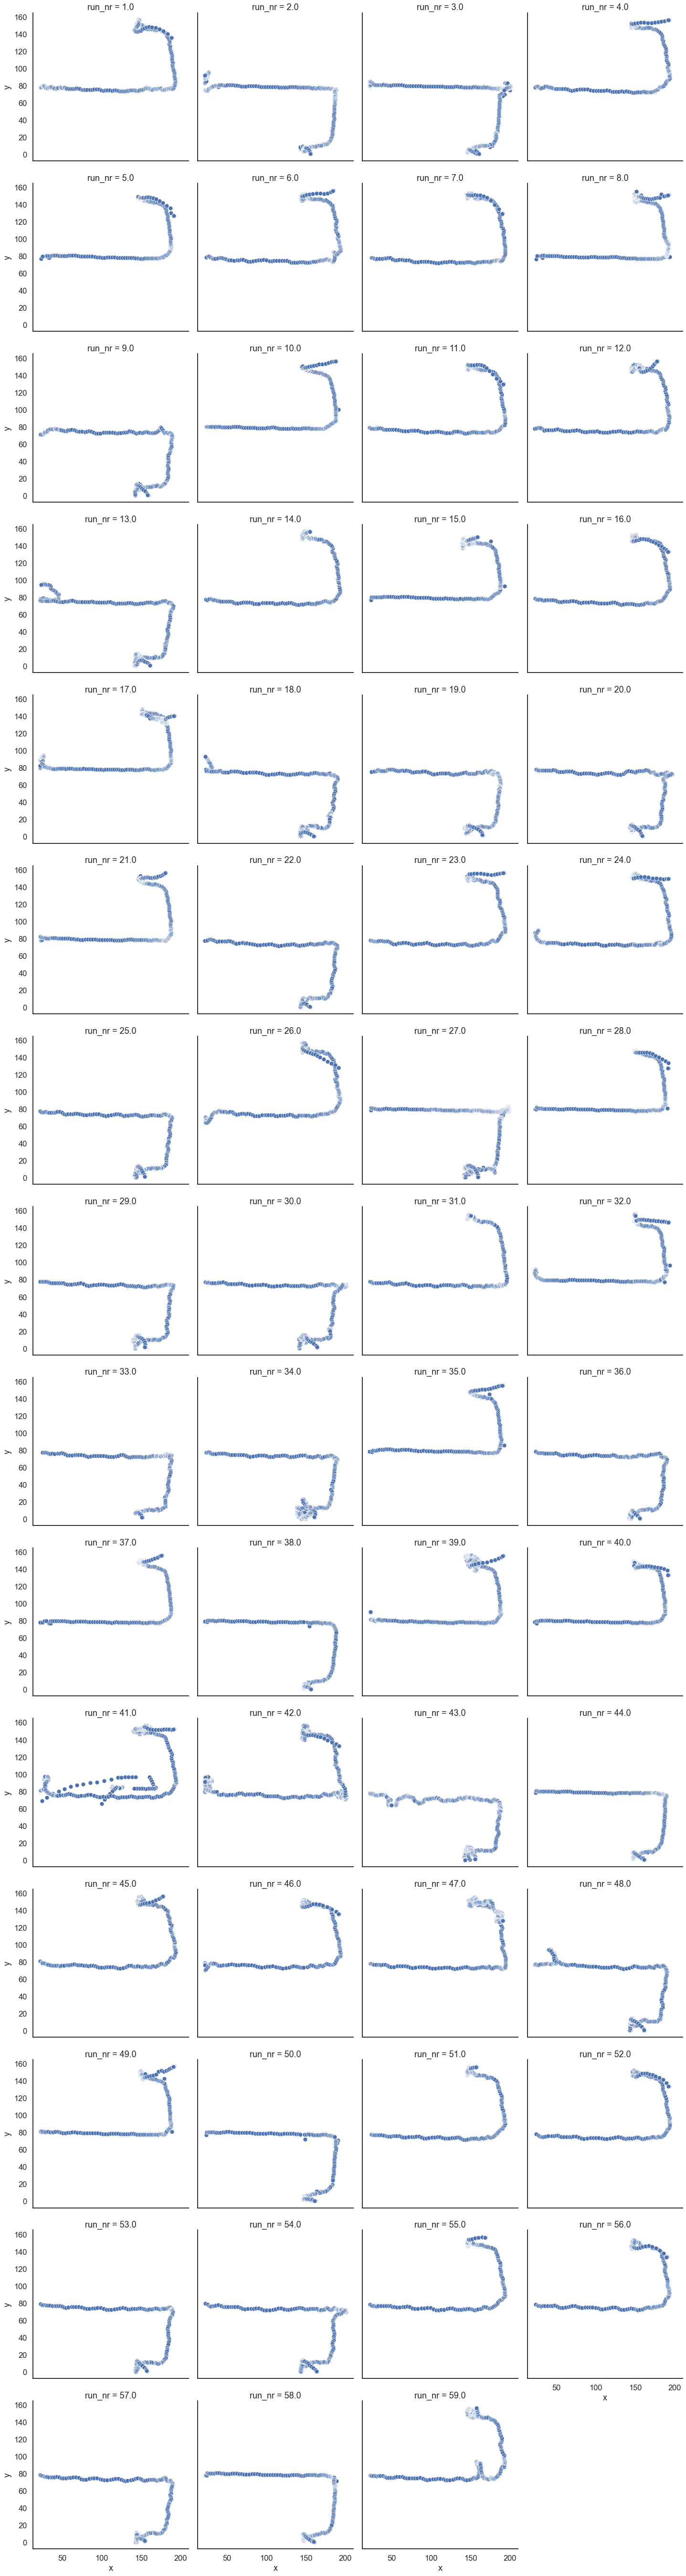

In [27]:
sns.set(style='white', context='talk')
g = sns.relplot(kind='scatter', data=session_data, x='x', y='y', col='run_nr', col_wrap=4)
plt.show()

# ***
# <font color=dodgerblue> Creating a run specs file
***


### Confirm that all runs are visually consistent with the rat's trajectories in space. Create a run_specs .csv file (for example: 'HEFESTO_RUN_SPECS_DNMP31_STIM10_2020-06-30T14_05_16.csv'), containing a mapping between the run numbers and each run information: 
   #### 1st. column - run_nr;  
   #### 2nd column - run_type ('S', sample or 'T', test); 
   #### 3rd column - stim_condition(0,1,3);
   #### 4th column - outcome(0 - error, 1 - correct). 
   #### If a run does not exist (is not visually consistent with a rat' trajectory, all other columns should contain 'NaN'.
   #### Column names should not be included in the file. They are added later on!
### Save as a .csv file into the directory containing the position and timestamp files, such that the run specifications can be added later on during the analysis.

# 